In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_scroll { height:35em !important; }</style>"))

In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
from hsip.reader.reader import open_ENVI
from hsip.reader.reader import open_TIF
from hsip.processing import processing 
from hsip.clustering.clustering import CosClust, SCH, HDBSCAN

In [9]:
tif = 'C:/Users/konst/Documents/GitHub/Moffett-Field-labeling/data/Cuprite97/Cuprite97.tif'
hsi = open_TIF(tif)
hsi.shape

(512, 614, 224)

In [5]:
_ = processing.rayleigh_scattering(hsi, inplace=True)

100%|███████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 685.19it/s]


In [6]:
hsi = processing.sigma_maximum_filter(hsi)

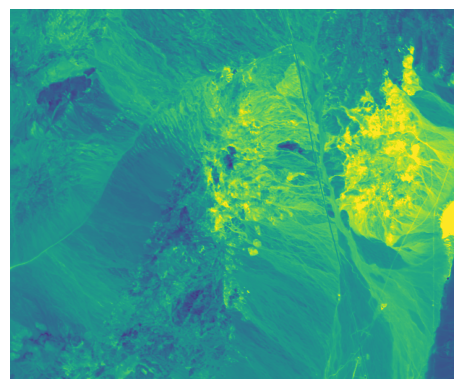

In [7]:
plt.figure()
plt.imshow(hsi[..., 93])
plt.axis('off')
plt.show()

In [5]:
flat_hsi = np.reshape(hsi, (hsi.shape[0] * hsi.shape[1], hsi.shape[2]))

model = CosClust(0.995)
labels = model.fit(flat_hsi)

print(f'Всего классов: {len(np.unique(labels))}')

ValueError: Very large sample! Recommended no more than 512000 samples. Submitted: 1448772.

In [7]:
model1 = SCH(fcluster_t=0.01)
labels1 = model1.fit(flat_hsi)

print(f'Всего классов: {len(np.unique(labels1))}')

ValueError: Very large sample! Recommended no more than 32000 samples. Submitted: 1448772.

In [8]:
model1 = HDBSCAN(min_cluster_size=10)
labels1 = model1.fit(flat_hsi)

print(f'Всего классов: {len(np.unique(labels1))}')

ValueError: Very large sample! Recommended no more than 64000 samples. Submitted: 1448772.

In [10]:
labels = np.reshape(labels, (hsi.shape[0], hsi.shape[1]))

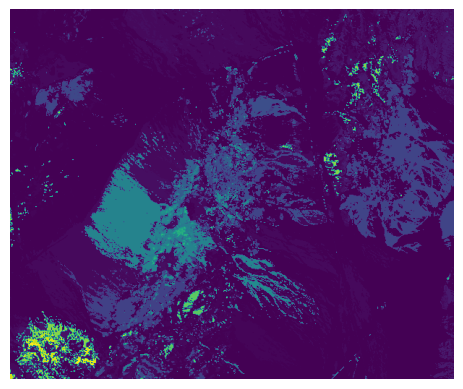

In [11]:
plt.figure()
plt.imshow(labels)
plt.axis('off')
plt.show()

In [12]:
from hsip.rgb.rgb import hsi_synthesize_rgb
from hsip.rgb.labels import labels_to_rgb
from hsip.rgb.colors import colors_set

In [13]:
rgb_image = hsi_synthesize_rgb(hsi, [29, 19, 9])

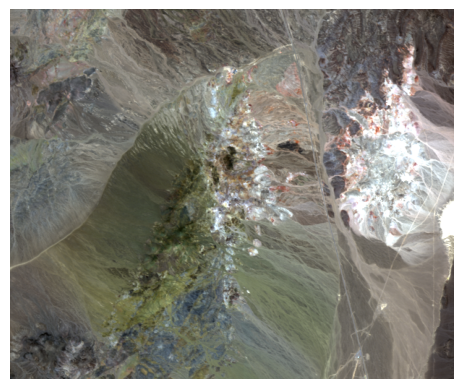

In [14]:
plt.figure()
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

In [15]:
color_labels = labels_to_rgb(labels)

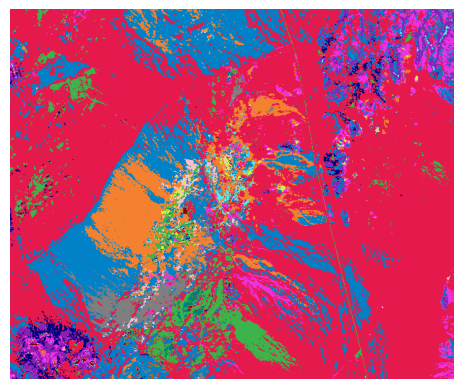

In [16]:
plt.figure()
plt.imshow(color_labels)
plt.axis('off')
plt.show()

In [17]:
rgb_labels = labels_to_rgb(labels, rgb_image)

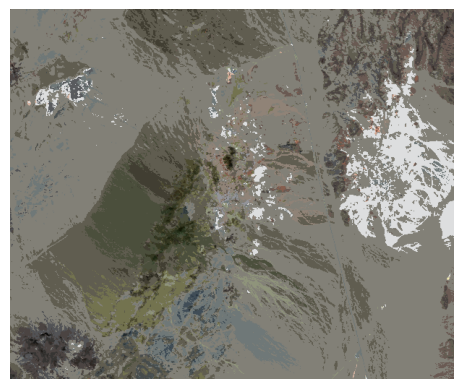

In [18]:
plt.figure()
plt.imshow(rgb_labels)
plt.axis('off')
plt.show()